## Step 1: Handling and Explore Data
The dataset comes in .dicom format.
We use os system functions to make a list of all the patient id, conresponding to the image folders.

In [1]:
import cv2

In [2]:
import dicom # for reading dicom files
import os # for doing directory operations 
import pandas as pd # for some simple data analysis (right now, just to load in the labels data and quickly reference it)

/usr/local/lib/python2.7/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


data_dir = '/home/web/projects/00_dsbowl2017/data/stage1/'
patients = os.listdir(data_dir)
patients
len(patients)

In [6]:
#monitor the current work directory
cwd = os.getcwd()
print cwd

/home/web/projects/101_DSB_lung_nodule/code


In [17]:
# Change this to wherever you are storing your data:

data_dir = '/home/web/projects/101_DSB_lung_nodule/data/stage1'
# make a list of all the patient IDs
patients = os.listdir(data_dir)
# load the label information for the image classification of lung cancer
labels_df = pd.read_csv('../data/stage1_labels.csv', index_col=0)

print labels_df.head()
print '\nThe patients list looks like this:\n{}'.format(patients[:5])

                                  cancer
id                                      
0015ceb851d7251b8f399e39779d1e7d       1
0030a160d58723ff36d73f41b170ec21       0
003f41c78e6acfa92430a057ac0b306e       0
006b96310a37b36cccb2ab48d10b49a3       1
008464bb8521d09a42985dd8add3d0d2       1

The patients list looks like this:
['f7c387290d7e3074501eac167c849000', '2365e0afe6844e955f3d4c23a16dc1a9', '4434e19303b62ebaecef2596583ff351', '7c2b72f9e0f5649c22902292febdc89f', '60a4915d8662dff30dc596ebccb83b3c']


Some of the images for certain patients are not labled, so we need to do some simple statistics to clarify it.

In [22]:
total_ids = len(patients)
cnt = 0
for patient in patients:
    if patient in labels_df.index:
        cnt += 1
print "There are {} patients' CT Scan images labeld out of {} total patients, the other {} unlabeled".format(cnt, total_ids, total_ids-cnt)

There are 1397 patients' CT Scan images labeld out of 1595 total patients, the other 198 unlabeled


for patient in patients[:2]:
    if patient in labels_df.index:
        
        print ("{} is in the lable file".format(patient))
        label = labels_df.get_value(patient, 'cancer')
        path = data_dir + patient
    
        # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
        slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
        

In [26]:
# Read a sample dicom file

for patient in patients[:2]:
    if patient in labels_df.index:
        
        print ("{} is in the lable file".format(patient))
        label = labels_df.get_value(patient, 'cancer')
        path = os.path.join(data_dir, patient)
    
        slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        print(len(slices),label)
        print(slices[0])
    else:
        print ("{} is not in the lable file".format(patient))
        

f7c387290d7e3074501eac167c849000 is not in the lable file
2365e0afe6844e955f3d4c23a16dc1a9 is in the lable file


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


(234, 1)
(0008, 0000) Group Length                        UL: 362
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7009.9004.700542472465131375345415214639
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0000) Group Length                        UL: 60
(0010, 0010) Patient's Name                      PN: '2365e0afe6844e955f3d4c23a16dc1a9'
(0010, 0020) Patient ID                          LO: '2365e0afe6844e955f3d4c23a16dc1a9'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 0000) Group Length                        UL: 392
(0020, 000d) Study Instance UID                  UI: 2.25.38413711337627300976989003070954124816038865520631126327650
(0020, 000e) Series Instance UID  

In [55]:
# Check the depth for image lices
for i in range(len(slices)):
    print ("the {}th depth/Z loc is {}".format(i, slices[i].ImagePositionPatient[2]))

the 0th depth/z loc is -277.000
the 1th depth/z loc is -277.625
the 2th depth/z loc is -276.375
the 3th depth/z loc is -275.125
the 4th depth/z loc is -275.750
the 5th depth/z loc is -274.500
the 6th depth/z loc is -273.875
the 7th depth/z loc is -273.250
the 8th depth/z loc is -272.000
the 9th depth/z loc is -272.625
the 10th depth/z loc is -271.375
the 11th depth/z loc is -270.125
the 12th depth/z loc is -270.750
the 13th depth/z loc is -269.500
the 14th depth/z loc is -268.875
the 15th depth/z loc is -268.250
the 16th depth/z loc is -267.625
the 17th depth/z loc is -267.000
the 18th depth/z loc is -266.375
the 19th depth/z loc is -265.750
the 20th depth/z loc is -265.125
the 21th depth/z loc is -264.500
the 22th depth/z loc is -263.875
the 23th depth/z loc is -263.250
the 24th depth/z loc is -262.625
the 25th depth/z loc is -262.000
the 26th depth/z loc is -261.375
the 27th depth/z loc is -260.125
the 28th depth/z loc is -260.750
the 29th depth/z loc is -259.500
the 30th depth/z loc

## Setp 2: Data visualization

In [59]:
for patient in patients[:1000]:
    if patient in labels_df.index:
        label = labels_df.get_value(patient, 'cancer')
        path = data_dir + patient
    
        # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
        slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        if len(slices) < 100:
            print(patient, slices[0].pixel_array.shape, len(slices))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


48fac79fead32f2b10e37752cb077af6 (512, 512) 95
099cec971282b1531d297e5d0d423598 (512, 512) 99
a6b7aa6b98dd87cf75a5e1f707369832 (512, 512) 94


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


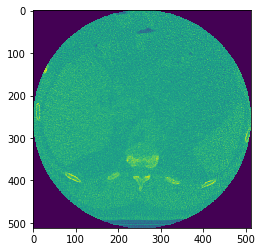

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

for patient in patients[1:2]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    #          the first slice
    plt.imshow(slices[0].pixel_array)
    plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


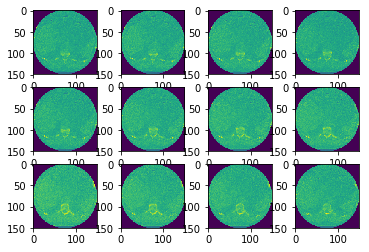

In [11]:
import cv2
import numpy as np

IMG_PX_SIZE = 150

for patient in patients[1:2]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    fig = plt.figure()
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_img = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_img)
    plt.show()